Si prega di compilare il modulo (le tue informazioni)
**Please fill in the form (your information)

In [ ]:
#Codice: Esame1-G1-A


#Nome: a puttani e mammata

#Cognome:rosario

#Matricola: 69 con mariachiara



**Domanda1**: Carica il dataset 'iris' in un oggetto DataFrame e visualizza (stampando) le prime 10 righe del DataFrame. Successivamente, crea un istogramma dell'attributo 'sepal length'. (6 punti)
==============================================================================================================
**Question1:** Load the 'iris' dataset into a DataFrame object and display (print) the first 10 rows of the DataFrame. Then, create a histogram plot of the 'sepal length' attribute. (6 points)

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   
5                5.4               3.9                1.7               0.4   
6                4.6               3.4                1.4               0.3   
7                5.0               3.4                1.5               0.2   
8                4.4               2.9                1.4               0.2   
9                4.9               3.1                1.5               0.1   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  
5       0  
6       0  
7       0  
8       0  
9       0 

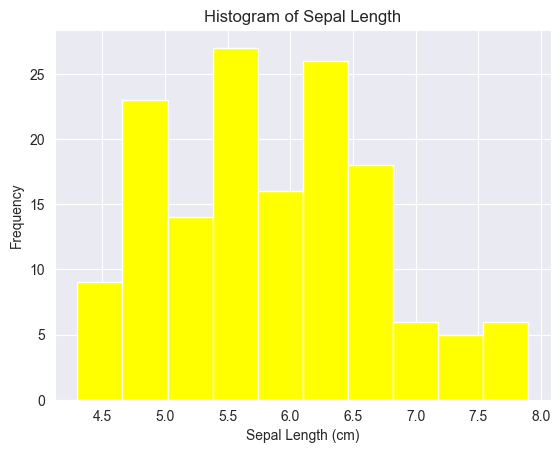

In [2]:
from matplotlib.pyplot import viridis
# load the libraries
from sklearn.datasets import load_iris
from pandas import DataFrame
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# load the data
iris = load_iris()

# Define the dataframe (define data and label as row and column)
df = DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

# print top 10 rows
print(df[:10])

# histogram plot
plt.hist(df['sepal length (cm)'], bins=10, color='yellow')

plt.xlabel('Sepal Length (cm)')
plt.ylabel('Frequency')
plt.title('Histogram of Sepal Length')
plt.show()


**Domanda2**: Applica l'algoritmo K-Means al dataset 'iris' per raggruppare i fiori in 3 cluster. Successivamente, visualizza i cluster risultanti utilizzando un grafico a dispersione che mostri lunghezza del petalo versus larghezza del petalo, con colori diversi che rappresentano ciascun cluster. (6 punti)
==============================================================================================================
**Question2:** Apply the K-Means algorithm to the 'iris' dataset to cluster the flowers into 3 clusters. Then, visualize the resulting clusters using a scatter plot of petal length versus petal width with different colors representing each cluster. (6 points)

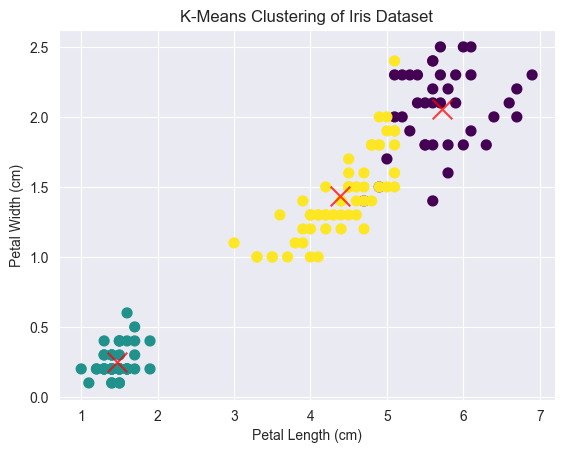

In [3]:
# define libraries
from sklearn.cluster import KMeans
np.random.seed(42)
# load data and define dataframe
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
X=iris.data

# define K-means clustering
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
# apply K-means clustering
df['Cluster'] = kmeans.predict(X)


# scatter plot
plt.scatter(X[:,2], X[:,3],c=df['Cluster'], s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:,2], centers[:,3], c='red', s=200, alpha=0.75, marker='x')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('K-Means Clustering of Iris Dataset')
plt.show()

**Domanda3**: Addestra un classificatore albero decisionale sul dataset 'wine' per predire la classe del vino. Valutare il modello utilizzando la metrica di accuratezza e visualizzare la matrice di confusione. Usare il 30% dei dati per il test del modello, il resto per il training. (9 punti)
============================================================================================================
**Question3:** Train a decision tree classifier on the 'wine' dataset to predict the wine class. Evaluate the model using the accuracy metric and display the confusion matrix. Use 30% of the data for test and the rest for training. (9 points)

Accuracy: 0.9444444444444444


NameError: name 'plt' is not defined

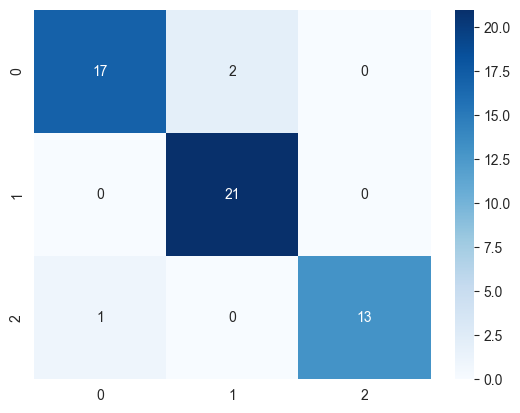

In [3]:
#  libraries
from sklearn.datasets import load_wine
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import pandas as pd

# load dataset and define dataframe
wine = load_wine()
df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
df['target'] = wine.target

# seprate the data and label
X = df.drop('target', axis=1)
y = df['target']

# define the train and test data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

# define the classifier
model = DecisionTreeClassifier()

#apply the classifier
model.fit(X_train, y_train)

# see the predictions on test data
y_pred = model.predict(X_test)

# calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)

#print the accuracy
print(f'Accuracy: {accuracy}')

#define the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# use sns to plot the confusion matrix
sns.heatmap(cm , annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


**Domanda 4**: Utilizza il dataset di immagini 'digits' per addestrare un classificatore random forest composto da 80 alberi decisionali per prevedere la cifra. Successivamente, usa la cross-validation con 5 folds per valutare l'accuratezza del modello. (9 punti)
======================================================================================================
**Question 4:** Use the 'digits' image dataset to train a random forest classifier with 80 trees to predict the digit. Then, use cross-validation with 5 folds to evaluate the model accuracy. (9 points)

In [5]:
# libraries
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# load dataset
digits = load_digits()
print(digits.feature_names)
print(digits.data[1].reshape(8,8))
print(digits.target.shape)
print(digits.target)
# define data and labels
X = digits.data
y = digits.target

# define the classifier
model = RandomForestClassifier(n_estimators=80, random_state=42)

#define and calculate the score with cross validation
scores = cross_val_score(model, X, y, cv=5)

# print the mean of score
print(f'Cross-validated Accuracy: {np.mean(scores)}')


['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1', 'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6', 'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3', 'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7']
[[ 0.  0.  0. 12. 13.  5.  0.  0.]
 [ 0.  0.  0. 11. 16.  9.  0.  0.]
 [ 0.  0.  3. 15. 16.  6.  0.  0.]
 [ 0.  7. 15. 16. 16.  2.  0.  0.]
 [ 0.  0.  1. 16. 16.  3.  